In [ ]:
#Let's look into https://pypi.org/project/category-encoders/
%pip install category_encoders

In [ ]:
import category_encoders as ce
import pandas as pd

### Ordinal Encoding

In [ ]:
df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})

In [ ]:
df

In [ ]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}}])

In [ ]:
df_ord = encoder.fit_transform(df)

In [ ]:
df_ord

### One-Hot Encoding

In [ ]:
data=pd.DataFrame({'City':[
'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi'
]})

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='City',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
data

In [ ]:
#Fit and transform Data
data_encoded = encoder.fit_transform(data)
data_encoded

### Dummy Encoding

Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

In [ ]:
data

In [ ]:
data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded

One hot encoder and dummy encoder are two powerful and effective encoding schemes. They are also very popular among the data scientists, But may not be as effective when-

A large number of levels are present in data. If there are multiple categories in a feature variable in such a case we need a similar number of dummy variables to encode the data. For example, a column with 30 different values will require 30 new variables for coding.
If we have multiple categorical features in the dataset similar situation will occur and again we will end to have several binary features each representing the categorical feature and their multiple categories e.g a dataset having 10 or more categorical columns.

### Effect Encoding

This encoding technique is also known as Deviation Encoding or Sum Encoding. Effect encoding is almost similar to dummy encoding, with a little difference. In dummy coding, we use 0 and 1 to represent the data but in effect encoding, we use three values i.e. 1,0, and -1.

In [ ]:
data

See References section to read a paper on dummy and effect encoding techniques

In [ ]:
encoder=ce.sum_coding.SumEncoder(cols='City',verbose=False,) 
encoder.fit_transform(data)

### Hash Encoder

Hashing is the transformation of arbitrary size input in the form of a fixed-size value. We use hashing algorithms to perform hashing operations i.e to generate the hash value of an input. Further, hashing is a one-way process, in other words, one can not generate original input from the hash representation.

Hashing has several applications like data retrieval, checking data corruption, and in data encryption also.

Just like one-hot encoding, the Hash encoder represents categorical features using the new dimensions. Here, the user can fix the number of dimensions after transformation using n_component argument. 

In [ ]:
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']})

#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Month',n_components=6)
data

In [ ]:
#Fit and Transform Data
encoder.fit_transform(data)

Since Hashing transforms the data in lesser dimensions, it may lead to loss of information. Another issue faced by hashing encoder is the collision. Since here, a large number of features are depicted into lesser dimensions, hence multiple values can be represented by the same hash value, this is known as a collision.

### Binary Encoding

The categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.

Binary encoding works really well when there are a high number of categories. For example the cities in a country where a company supplies its products.

In [ ]:
#Create the Dataframe
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['City'],return_df=True)

#Original Data
data


In [ ]:
#Fit and Transform Data 
data_encoded=encoder.fit_transform(data) 
data_encoded

### BaseN Encoding

In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4 or 8.

In [ ]:
data

In [ ]:
encoder= ce.BaseNEncoder(cols=['City'],return_df=True,base=5)
data_encoded=encoder.fit_transform(data)
data_encoded

### Target Encoding

Target encoding is a Baysian encoding technique.

Bayesian encoders use information from dependent/target variables to encode the categorical data.

In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category..

In [ ]:
#Create the Dataframe
data=pd.DataFrame({'class':['A','B','C','B','C','A','A','A'],'Marks':[50,30,70,80,45,97,80,68]})

#Create target encoding object
encoder=ce.TargetEncoder(cols='class') 

#Original Data
data

In [ ]:
#Fit and Transform Train Data
encoder.fit_transform(data['class'],data['Marks'])

We perform Target encoding for train data only and code the test data using results obtained from the training dataset. Although, a very efficient coding system, it has the following issues responsible for deteriorating the model performance-

It can lead to target leakage or overfitting. To address overfitting we can use different techniques.
In the leave one out encoding, the current target value is reduced from the overall mean of the target to avoid leakage.
In another method, we may introduce some Gaussian noise in the target statistics. The value of this noise is hyperparameter to the model.
The second issue, we may face is the improper distribution of categories in train and test data. In such a case, the categories may assume extreme values. Therefore the target means for the category are mixed with the marginal mean of the target.

### Binning

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. There are several different terms for binning including bucketing, discrete binning, discretization or quantization. Pandas supports these approaches using the cut and qcut functions. 

If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric bin ranges, then use cut .

In [ ]:
%pip install xlrd

In [59]:
import pandas as pd
import numpy as np

#Create a DataFrame
df1 = {
    'Name':['George','Andrea','micheal','maggie','Ravi','Xien','Jalpa','Tyieren'],    
    'Score':[63,48,56,75,32,77,85,22]
    
   }


df1 = pd.DataFrame(df1,columns=['Name','Score'])
print(df1)

      Name  Score
0   George     63
1   Andrea     48
2  micheal     56
3   maggie     75
4     Ravi     32
5     Xien     77
6    Jalpa     85
7  Tyieren     22


In [60]:
''' binning or bucketing with range'''

bins = [0, 25, 50, 75, 100]
df1['binned'] = pd.cut(df1['Score'], bins)
print (df1)

      Name  Score     binned
0   George     63   (50, 75]
1   Andrea     48   (25, 50]
2  micheal     56   (50, 75]
3   maggie     75   (50, 75]
4     Ravi     32   (25, 50]
5     Xien     77  (75, 100]
6    Jalpa     85  (75, 100]
7  Tyieren     22    (0, 25]


In [61]:
''' binning or bucketing with labels''' 

bins = [0, 25, 50, 75, 100]
labels =[1,2,3,4]
df1['binned'] = pd.cut(df1['Score'], bins,labels=labels)
print (df1)


      Name  Score binned
0   George     63      3
1   Andrea     48      2
2  micheal     56      3
3   maggie     75      3
4     Ravi     32      2
5     Xien     77      4
6    Jalpa     85      4
7  Tyieren     22      1


#### Another Example: Guided Lab



In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
sns.set_style('whitegrid')

In [65]:
#raw_df = pd.read_excel(r"C:\Users\Purushotham\Desktop\deloitte\eda\datasets\sample-sales-v3.xlsx")
raw_df = pd.read_csv(r"C:\Users\Purushotham\Desktop\deloitte\eda\datasets\sample-sales-v3.csv")
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [66]:
raw_df.shape

(1500, 7)

In [71]:
df = raw_df.groupby(['account number', 'name'])['ext price'] 
df = df.sum().reset_index()

In [72]:
df

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,135841.99


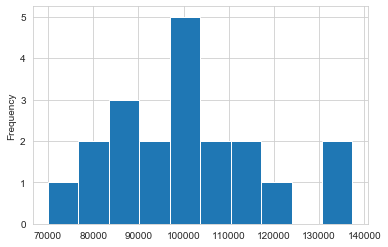

In [39]:
# HIstogram
df['ext price'].plot(kind='hist')

In [73]:
df['ext price'].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

In [74]:
pd.qcut(df['ext price'], q=4)

0       (70004.359, 89137.708]
1      (89137.708, 100271.535]
2       (70004.359, 89137.708]
3      (110132.552, 137351.96]
4      (89137.708, 100271.535]
5      (89137.708, 100271.535]
6       (70004.359, 89137.708]
7     (100271.535, 110132.552]
8      (110132.552, 137351.96]
9      (110132.552, 137351.96]
10     (89137.708, 100271.535]
11      (70004.359, 89137.708]
12      (70004.359, 89137.708]
13     (89137.708, 100271.535]
14    (100271.535, 110132.552]
15     (110132.552, 137351.96]
16    (100271.535, 110132.552]
17     (110132.552, 137351.96]
18    (100271.535, 110132.552]
19    (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(70004.359, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 137351.96]]

In [75]:
# Add the columns
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

In [76]:
df

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,"(89137.708, 100271.535]","(87168.0, 90686.0]"
6,307599,"Kassulke, Ondricka and Metz",86451.07,"(70004.359, 89137.708]","(82368.0, 87168.0]"
7,383080,Will LLC,104437.60,"(100271.535, 110132.552]","(103606.0, 105938.0]"
8,412290,Jerde-Hilpert,112591.43,"(110132.552, 137351.96]","(112290.0, 124627.0]"
9,424914,White-Trantow,135841.99,"(110132.552, 137351.96]","(124627.0, 137352.0]"


In [77]:
df['quantile_ex_1'].value_counts()

(110132.552, 137351.96]     5
(100271.535, 110132.552]    5
(89137.708, 100271.535]     5
(70004.359, 89137.708]      5
Name: quantile_ex_1, dtype: int64

In [78]:
df['quantile_ex_2'].value_counts()

(124627.0, 137352.0]    2
(112290.0, 124627.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(82368.0, 87168.0]      2
(70003.0, 82368.0]      2
Name: quantile_ex_2, dtype: int64

In [46]:
# Add labels
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [47]:
# Create a results table
results, bin_edges = pd.qcut(df['ext price'],
                             q=[0, .2, .4, .6, .8, 1],
                             labels=bin_labels_5,
                             retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                             columns=['Threshold', 'Tier'])

In [48]:
results_table

,Threshold,Tier
0,70004.360,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


### cut

In [50]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3'])

In [51]:
df

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,135841.99


In [52]:
pd.cut(df['ext price'], bins=4).value_counts()

(86841.26, 103678.16]     9
(103678.16, 120515.06]    4
(69937.012, 86841.26]     4
(120515.06, 137351.96]    3
Name: ext price, dtype: int64

In [53]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

In [54]:
df

,account number,name,ext price,cut_ex1
0,141962,Herman LLC,82865.00,gold
1,146832,Kiehn-Spinka,99608.77,gold
2,163416,Purdy-Kunde,77898.21,gold
3,218895,Kulas Inc,137351.96,diamond
4,239344,Stokes LLC,91535.92,gold
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,gold
6,307599,"Kassulke, Ondricka and Metz",86451.07,gold
7,383080,Will LLC,104437.60,platinum
8,412290,Jerde-Hilpert,112591.43,platinum
9,424914,White-Trantow,135841.99,diamond


In [55]:
# Custom bins
np.linspace(0, 200000, 9)
pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9))

0      (75000.0, 100000.0]
1      (75000.0, 100000.0]
2      (75000.0, 100000.0]
3     (125000.0, 150000.0]
4      (75000.0, 100000.0]
5      (75000.0, 100000.0]
6      (75000.0, 100000.0]
7     (100000.0, 125000.0]
8     (100000.0, 125000.0]
9     (125000.0, 150000.0]
10     (75000.0, 100000.0]
11      (50000.0, 75000.0]
12     (75000.0, 100000.0]
13     (75000.0, 100000.0]
14    (100000.0, 125000.0]
15    (100000.0, 125000.0]
16    (100000.0, 125000.0]
17    (100000.0, 125000.0]
18    (100000.0, 125000.0]
19    (100000.0, 125000.0]
Name: ext price, dtype: category
Categories (8, interval[float64]): [(0.0, 25000.0] < (25000.0, 50000.0] < (50000.0, 75000.0] < (75000.0, 100000.0] < (100000.0, 125000.0] < (125000.0, 150000.0] < (150000.0, 175000.0] < (175000.0, 200000.0]]

### Lab: Bin the data with an interval of 10000 and a range from 10000 to 200000


Use pd.interval_range() and pd.cut()

IntervalIndex([[0, 10000), [10000, 20000), [20000, 30000), [30000, 40000), [40000, 50000) ... [150000, 160000), [160000, 170000), [170000, 180000), [180000, 190000), [190000, 200000)],
              closed='left',
              dtype='interval[int64]')

,account number,name,ext price,cut_ex1,cut_ex2
0,141962,Herman LLC,82865.00,gold,"(80000, 90000]"
1,146832,Kiehn-Spinka,99608.77,gold,"(90000, 100000]"
2,163416,Purdy-Kunde,77898.21,gold,"(70000, 80000]"
3,218895,Kulas Inc,137351.96,diamond,"(130000, 140000]"
4,239344,Stokes LLC,91535.92,gold,"(90000, 100000]"
